In [22]:
import numpy as np
import matplotlib.pyplot as plt

from halotools.mock_observables import delta_sigma, return_xyz_formatted_array
from halotools.utils import randomly_downsample_data
import time


In [2]:
# halo_directory = '/Users/fardila/Documents/GitHub/baryonic_effects/sample_data/'
halo_directory = '/Users/fardila/Documents/Data/baryonic_effects/input/halo_catalogs/'
# particle_directory = '/Users/fardila/Documents/GitHub/baryonic_effects/sample_data/'
particle_directory = '/Users/fardila/Documents/Data/baryonic_effects/input/particle_catalogs/'

halo_file_all = 'um_smdpl_insitu_exsitu_0.7124_basic_logmp_11.5.npy'
halo_file_Mpeak13 = 'um_smdpl_insitu_exsitu_0.7124_basic_logmp_11.5_cutMpeak13.npy'
particle_file_50M = 'um_smdpl_particles_0.7124_50m.npy'
particle_file_10M = 'um_smdpl_particles_0.7124_10m.npy'

In [23]:
def DS_from_catalog_files(halo_cat_file, particle_cat_file):


    print('loading catalogs!')
    halo_cat = np.load(halo_cat_file)
    particle_cat = np.load(particle_cat_file)
    
    print('formatting positions!')
    halo_cat_positions = return_xyz_formatted_array(halo_cat['x'], halo_cat['y'], halo_cat['z'])
    particle_cat_positions = return_xyz_formatted_array([particle[0] for particle in particle_cat],
                                                    [particle[1] for particle in particle_cat],
                                                    [particle[2] for particle in particle_cat])
    
    n_particles_per_dim=3840
    n_particles_tot = (n_particles_per_dim ** 3)
    downsampling_factor = (n_particles_tot / float(len(particle_cat)))
    m_particle=9.63E7 #Msun/h
    box_size=400 #Mpc/h
    wl_min_r=0.08
    wl_max_r=50.0
    wl_n_bins=22
    rp_bins = np.logspace(np.log10(wl_min_r), np.log10(wl_max_r), wl_n_bins)
    
    print('calculating DS!')
    rp_mids, ds = delta_sigma(galaxies=halo_cat_positions,
                          particles=particle_cat_positions, particle_masses=m_particle,
                          downsampling_factor=downsampling_factor,
                          rp_bins=rp_bins, period=box_size,
                          num_threads = 'max')
    
    return rp_mids, ds

def DS_from_catalogs(halo_cat, particle_cat):

    
    print('formatting positions!')
    halo_cat_positions = return_xyz_formatted_array(halo_cat['x'], halo_cat['y'], halo_cat['z'])
    particle_cat_positions = return_xyz_formatted_array([particle[0] for particle in particle_cat],
                                                    [particle[1] for particle in particle_cat],
                                                    [particle[2] for particle in particle_cat])
    
    n_particles_per_dim=3840
    n_particles_tot = (n_particles_per_dim ** 3)
    downsampling_factor = (n_particles_tot / float(len(particle_cat)))
    m_particle=9.63E7 #Msun/h
    box_size=400 #Mpc/h
    wl_min_r=0.08
    wl_max_r=50.0
    wl_n_bins=22
    rp_bins = np.logspace(np.log10(wl_min_r), np.log10(wl_max_r), wl_n_bins)
    
    print('calculating DS!')
    rp_mids, ds = delta_sigma(galaxies=halo_cat_positions,
                          particles=particle_cat_positions, particle_masses=m_particle,
                          downsampling_factor=downsampling_factor,
                          rp_bins=rp_bins, period=box_size,
                          num_threads = 'max')
    
    return rp_mids, ds

In [6]:
time_i = time.time()
rp_mids_Mpeak13_10M, ds_Mpeak13_10M = DS_from_catalog_files(halo_directory+halo_file_Mpeak13,
                                                particle_directory+particle_file_10M)
print('{0} seconds to run'.format(time.time()-time_i))

loading catalogs!
formatting positions!
calculating DS!
149.28847885131836 seconds to run


In [11]:
time_i = time.time()
rp_mids_all_halo_50M, ds_all_halo_50M = DS_from_catalog_files(halo_directory+halo_file_all,
                                                particle_directory+particle_file_50M)
print('{0} seconds to run'.format(time.time()-time_i))

loading catalogs!
formatting positions!
calculating DS!
21867.64765381813 seconds to run


In [14]:
time_i = time.time()
rp_mids_all_halo_10M, ds_all_halo_10M = DS_from_catalog_files(halo_directory+halo_file_all,
                                                particle_directory+particle_file_10M)
print('{0} seconds to run'.format(time.time()-time_i))

loading catalogs!
formatting positions!
calculating DS!
4271.293763875961 seconds to run


In [13]:
time_i = time.time()
rp_mids_Mpeak13_50M, ds_Mpeak13_50M = DS_from_catalog_files(halo_directory+halo_file_Mpeak13,
                                                particle_directory+particle_file_50M)
print('{0} seconds to run'.format(time.time()-time_i))

loading catalogs!
formatting positions!
calculating DS!
775.5017368793488 seconds to run


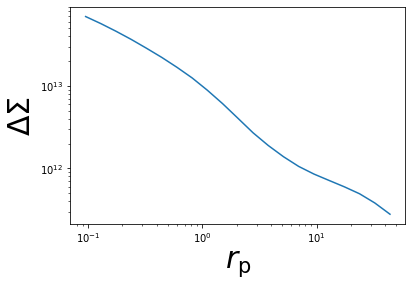

In [10]:
plt.loglog(rp_mids_all_halo_50M, ds_all_halo_50M, label='All halos, 50M particles')
plt.loglog(rp_mids_Mpeak13_10M,ds_Mpeak13_10M, label='Mpeak > 13 halos, 10M particles')

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.show()

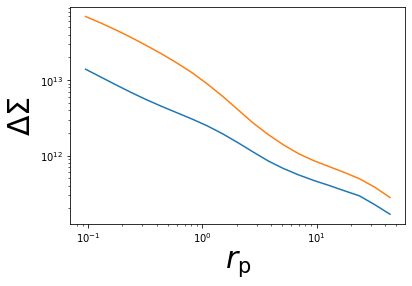

In [12]:
plt.loglog(rp_mids_all_halo_50M, ds_all_halo_50M, label='All halos, 50M particles')
plt.loglog(rp_mids_Mpeak13_10M,ds_Mpeak13_10M, label='Mpeak > 13 halos, 10M particles')

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.show()

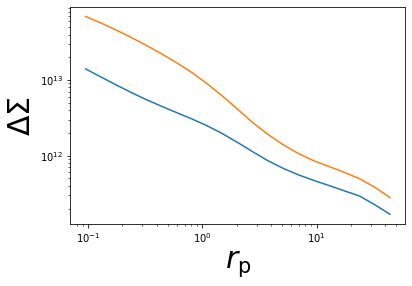

In [15]:
plt.loglog(rp_mids_all_halo_10M, ds_all_halo_10M, label='All halos, 10M particles')
plt.loglog(rp_mids_Mpeak13_50M,ds_Mpeak13_50M, label='Mpeak > 13 halos, 50M particles')

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.show()

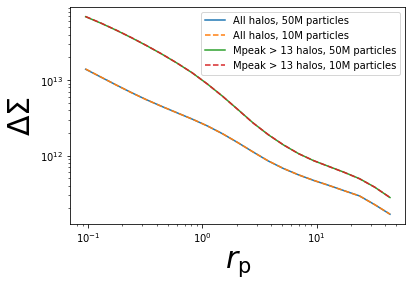

In [18]:
plt.loglog(rp_mids_all_halo_50M, ds_all_halo_50M, label='All halos, 50M particles')
plt.loglog(rp_mids_all_halo_10M, ds_all_halo_10M, linestyle='--', label='All halos, 10M particles')
plt.loglog(rp_mids_Mpeak13_50M,ds_Mpeak13_50M, label='Mpeak > 13 halos, 50M particles')
plt.loglog(rp_mids_Mpeak13_10M,ds_Mpeak13_10M, linestyle='--', label='Mpeak > 13 halos, 10M particles')

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.legend()

plt.show()

In [21]:
wl_min_r=0.08
wl_max_r=50.0
wl_n_bins=22
np.log(np.logspace(np.log10(wl_min_r), np.log10(wl_max_r), wl_n_bins))

array([-2.52572864, -2.21916904, -1.91260944, -1.60604984, -1.29949023,
       -0.99293063, -0.68637103, -0.37981143, -0.07325183,  0.23330778,
        0.53986738,  0.84642698,  1.15298658,  1.45954619,  1.76610579,
        2.07266539,  2.37922499,  2.6857846 ,  2.9923442 ,  3.2989038 ,
        3.6054634 ,  3.91202301])

## check even fewer particles

In [27]:
halo_cat = np.load(halo_directory+halo_file_Mpeak13)
particle_cat = np.load(particle_directory+particle_file_50M)

formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!


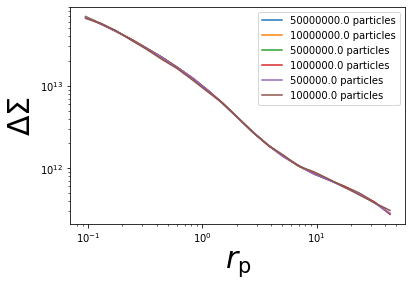

In [28]:
for num_ptcls_to_use in [5e7, 1e7, 5e6, 1e6, 5e5, 1e5]:
    particle_cat_reduced = randomly_downsample_data(particle_cat, int(num_ptcls_to_use))
    rp_mids, ds = DS_from_catalogs(halo_cat, particle_cat_reduced)
    
    plt.loglog(rp_mids,ds, linestyle='-', label='{0} particles'.format(str(num_ptcls_to_use)))

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.legend()

plt.show()

In [38]:
halo_cat_cut13 = halo_cat[(halo_cat['logmh_peak']>13.2) & (halo_cat['logmh_peak']<13.3)]
halo_cat_cut14 = halo_cat[(halo_cat['logmh_peak']>14.2) & (halo_cat['logmh_peak']<14.3)]

In [39]:
print(len(halo_cat_cut13), len(halo_cat_cut14))

6599 322


formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!


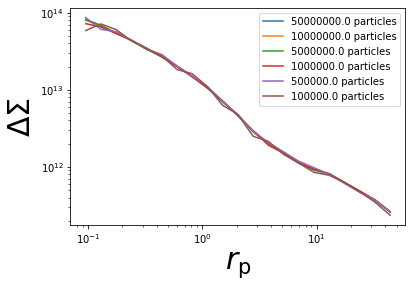

In [35]:
for num_ptcls_to_use in [5e7, 1e7, 5e6, 1e6, 5e5, 1e5]:
    particle_cat_reduced = randomly_downsample_data(particle_cat, int(num_ptcls_to_use))
    rp_mids, ds = DS_from_catalogs(halo_cat_cut, particle_cat_reduced)
    
    plt.loglog(rp_mids,ds, linestyle='-', label='{0} particles'.format(str(num_ptcls_to_use)))

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.legend()

plt.show()

formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!


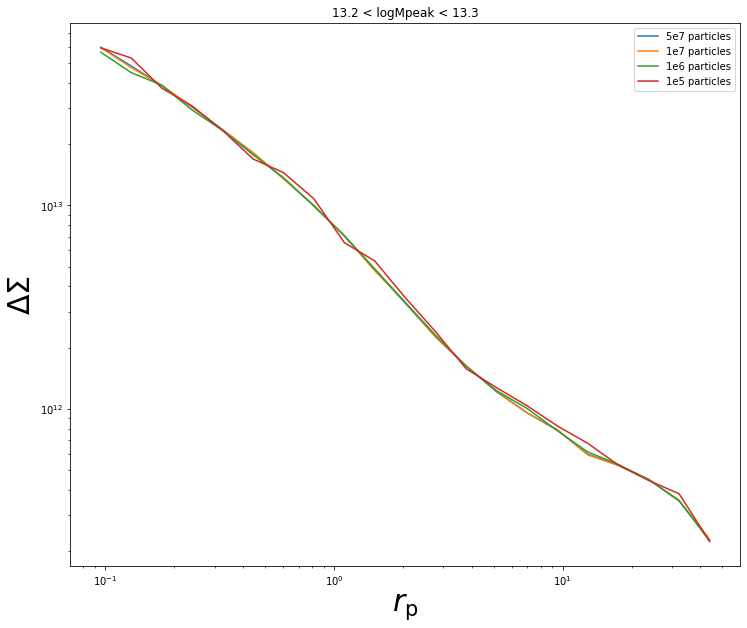

In [43]:
plt.figure(figsize=[12,10])
for num_ptcls_to_use, label in zip([5e7, 1e7, 1e6, 1e5],['5e7', '1e7', '1e6', '1e5']):
    particle_cat_reduced = randomly_downsample_data(particle_cat, int(num_ptcls_to_use))
    rp_mids, ds = DS_from_catalogs(halo_cat_cut13, particle_cat_reduced)
    
    plt.loglog(rp_mids,ds, linestyle='-', label='{0} particles'.format(label))

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.legend()
plt.title('13.2 < logMpeak < 13.3')
plt.show()

formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!
formatting positions!
calculating DS!


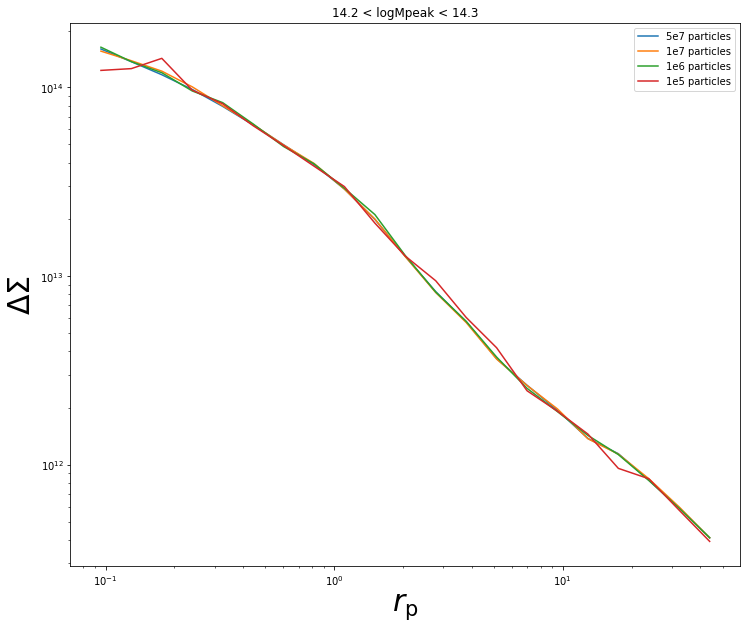

In [44]:
plt.figure(figsize=[12,10])
for num_ptcls_to_use, label in zip([5e7, 1e7, 1e6, 1e5],['5e7', '1e7', '1e6', '1e5']):
    particle_cat_reduced = randomly_downsample_data(particle_cat, int(num_ptcls_to_use))
    rp_mids, ds = DS_from_catalogs(halo_cat_cut14, particle_cat_reduced)
    
    plt.loglog(rp_mids,ds, linestyle='-', label='{0} particles'.format(label))

plt.xlabel(r'$r_{\rm p}$', fontsize=30)
# plt.xlabel(r'$r_{\rm p}$ ${\rm [Mpc]}$', fontsize=30)
plt.ylabel(r'$\Delta \Sigma$', fontsize=30)
# plt.ylabel(r'$\Delta\Sigma$ $[M_{\odot}/{\rm pc}^2]$', fontsize=30)

plt.legend()
plt.title('14.2 < logMpeak < 14.3')
plt.show()